<a href="https://colab.research.google.com/github/mohammedgamal23/breastCancerDetection-ML/blob/master/BreastCancerDetection_1st_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# get data
df = pd.read_csv('/content/drive/My Drive/data.csv')

# Count the number of (rows, columns) in our data set
df.shape

(569, 33)

In [0]:
# Count the number of empty values in each column - NaN, NAN, Na

df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [0]:
# get rid of the column 'Unnamed' as from previous cell it's useless

df = df.dropna(axis=1) 

In [0]:
df.shape

(569, 32)

In [0]:
# Malignant 'M' VS Benign 'B' Cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

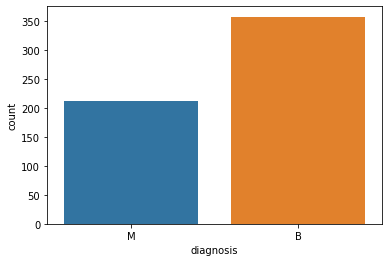

In [0]:
# Count Visualisation
sns.countplot(df['diagnosis'],label='count')

In [0]:
# Look at datatypes 
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [0]:
# Encode categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()

# df.iloc[:,1].values == Array contains values of all data at column1

df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values) 

# Now M -> 1 , B -> 0



/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


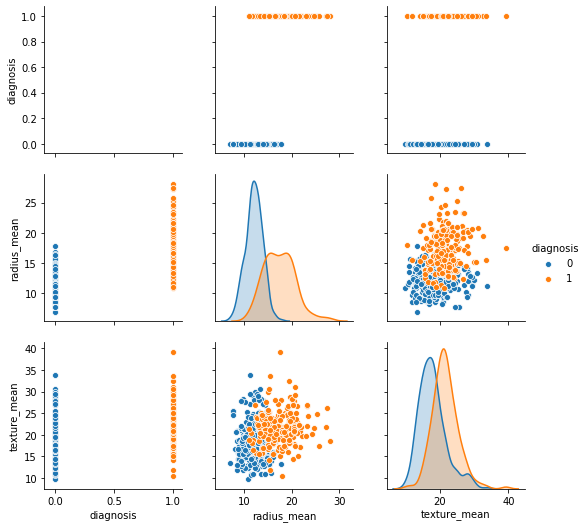

In [0]:
# Create a pair plot with seaborn
sns.pairplot(df.iloc[:,1:4], hue='diagnosis') 

# 1:4 for example purpose but in realProject it'll be using all columns 

In [0]:
df.head(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [0]:
 # Correlation - influence of a column to another
 # 1 if it has the most positive infuence, 0 if it doesn't, negative value if it has negative impact 
 df.iloc[:,1:11].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000


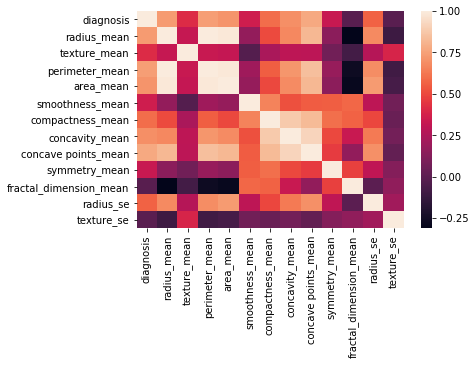

In [0]:
# Visualize Correlation
sns.heatmap(df.iloc[:,1:14].corr())

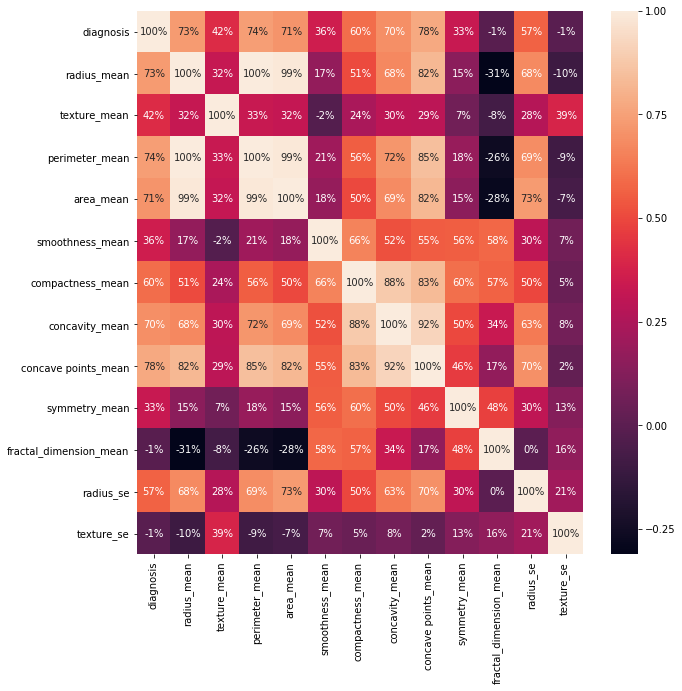

In [0]:
 # Advanced Visualization
 plt.figure(figsize=(10,10)) # edit the size of each figure
 sns.heatmap(df.iloc[:,1:14].corr(), annot=True, fmt='.0%') # annot adds the value

In [0]:
# Let's get to work, baby :'D
# Cancer detection process
# split data set into independent and dependent -i don't know why?!
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values #independent

In [0]:
# 75% training 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 0)

# What is random state?
X_train[0]

array([1.185e+01, 1.746e+01, 7.554e+01, 4.327e+02, 8.372e-02, 5.642e-02,
       2.688e-02, 2.280e-02, 1.875e-01, 5.715e-02, 2.070e-01, 1.238e+00,
       1.234e+00, 1.388e+01, 7.595e-03, 1.500e-02, 1.412e-02, 8.578e-03,
       1.792e-02, 1.784e-03, 1.306e+01, 2.575e+01, 8.435e+01, 5.178e+02,
       1.369e-01, 1.758e-01, 1.316e-01, 9.140e-02, 3.101e-01])

In [0]:
# Scale data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# What is the scale here? from -1 to 1?
X_train[0]

array([-0.65079907, -0.43057322, -0.68024847, -0.62698309, -0.91381897,
       -0.93335153, -0.78763077, -0.67944444,  0.25404078, -0.79877182,
       -0.68958948,  0.04723809, -0.78036299, -0.55337361,  0.21546423,
       -0.59450332, -0.55964264, -0.52889336, -0.30718648, -0.73414209,
       -0.6661438 ,  0.01849243, -0.68117939, -0.63150142,  0.19196229,
       -0.50775064, -0.69592933, -0.36433881,  0.32349851])

In [0]:
# Create a function for the models

def models(X_train, Y_train):
  
  #logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train, Y_train)

  #Desicion Tree Classifier
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train, Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=0)
  forest.fit(X_train, Y_train)

  # Print the models accuracy on the training data
  print('[0]Logistic Regression      Acc: ', log.score(X_train, Y_train))
  print('[1]Desicion Tree Classifier Acc: ', tree.score(X_train, Y_train))
  print('[2]Random Forest Classifier Acc: ', forest.score(X_train, Y_train))
  
  return log, tree, forest


In [0]:
model = models(X_train,Y_train)

[0]Logistic Regression      Acc:  0.9906103286384976
[1]Desicion Tree Classifier Acc:  1.0
[2]Random Forest Classifier Acc:  0.9953051643192489


In [0]:
# test model accuracy on test data
from sklearn.metrics import confusion_matrix
for i in range( len(model) ):
  cm = confusion_matrix(Y_test,model[i].predict(X_test)) # [[True positive, True negative], [False Positive, False Negative]
  print('Model', i) 
  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  print('Testing Accuracy =', (TP + TN)/(TP + TN + FN + FP))

Model 0
Testing Accuracy = 0.951048951048951
Model 1
Testing Accuracy = 0.9370629370629371
Model 2
Testing Accuracy = 0.965034965034965


In [0]:
# Another way of getting the metrics of models
from sklearn.metrics import classification_report, accuracy_score
for i in range( len(model) ):
  print( classification_report(Y_test, model[i].predict(X_test)))
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.88      0.96      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

0.9370629370629371

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97  